#  Project 3: Harris Corner Detection and Matching

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

(-0.5, 1305.5, 978.5, -0.5)

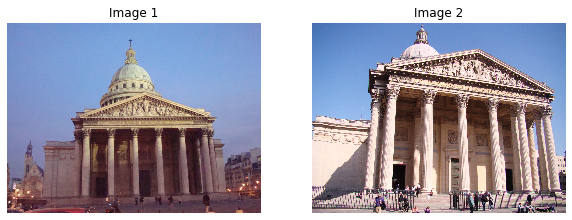

In [19]:
img1 = cv2.imread('../data/pantheon_1.jpg')
img2 = cv2.imread('../data/pantheon_2.jpg')



gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray1 = np.float32(gray1)

gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray2 = np.float32(gray2)


fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2[:,:,::-1])#,cmap='gray')
plt.title("Image 2")
plt.axis('off')
#plt.show()


# Get Harris Corners, normalize the corner values between 0 and 255. 

Starting Harris Corners...
Starting Harris Corners...


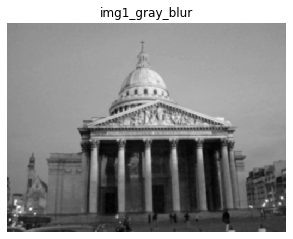

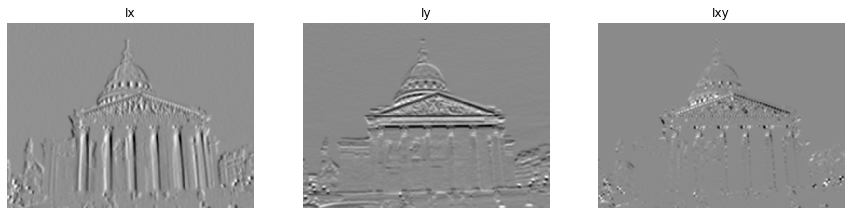

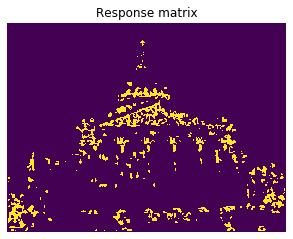

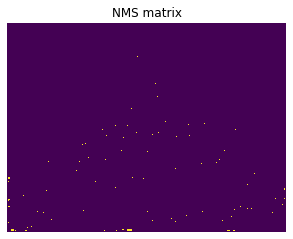

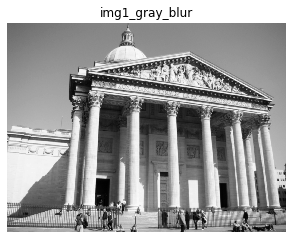

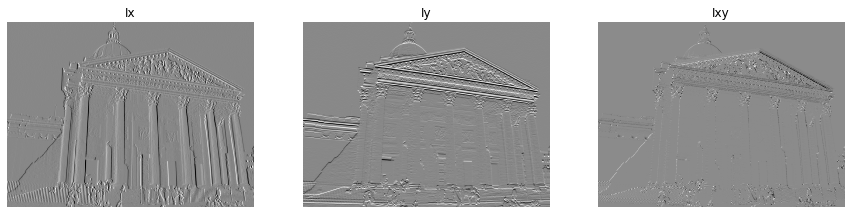

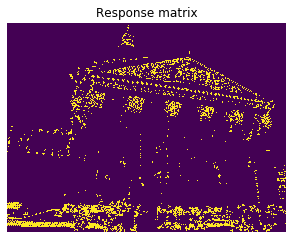

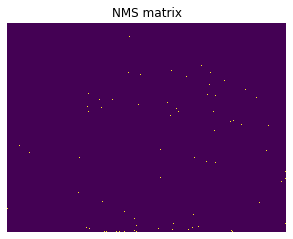

In [23]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=5, alpha=0.04, threshold=10**6, nms_size=10,ver=1)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=5, alpha=0.04, threshold=10**6, nms_size=10,ver=1)

#corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


In [4]:
#corners1

# Set the threshold for corners and generate key points from these corners

done
done


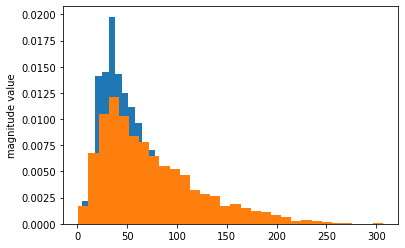

In [24]:
threshold = 100
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold)

# Draw the key points. The line (radius) depicts the gradient

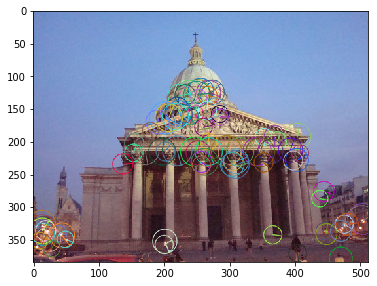

In [25]:
cv2.drawKeypoints(img1, kp1, img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img1,6)
plt.show()   

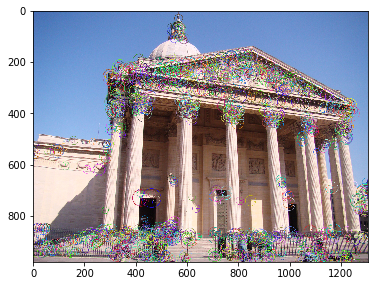

In [26]:
cv2.drawKeypoints(img2, kp2, img2,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img2,6)
plt.show()   

# From these key points, generate SIFT descriptors. Then match these descriptors



In [27]:
# create sift instance
sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = sift.compute(img1, kp1)[1]
descriptors2 = sift.compute(img2, kp2)[1]



# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img3, flags=2)



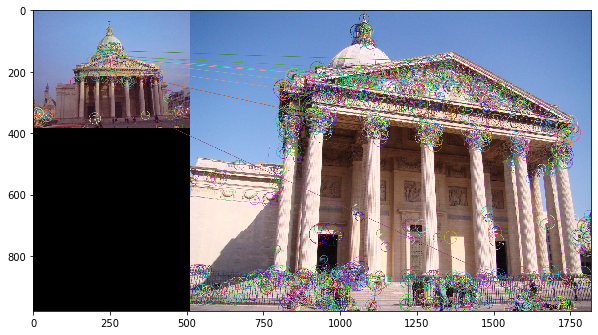

True

In [28]:
plotFigure(img3,10)
plt.show() 
cv2.imwrite('../results/matched.png', img3)
